# **CARGA DE TRAIN Y TEST**

In [1]:
import numpy as np
import pandas as pd

In [2]:
x_train=pd.read_excel('05-x_train-RAVDESS-SINRUIDOSEXTREMOS-dato_audioopensmile.xlsx',index_col=0)
x_test=pd.read_excel('05-x_test-RAVDESS-SINRUIDOSEXTREMOS-dato_audioopensmile.xlsx',index_col=0)
y_train=pd.read_excel('05-y_train-RAVDESS-SINRUIDOSEXTREMOS-dato_audioopensmile.xlsx',index_col=0)
y_test=pd.read_excel('05-y_test-RAVDESS-SINRUIDOSEXTREMOS-dato_audioopensmile.xlsx',index_col=0)


# **SELECCION DE CARACTERISTICAS**

In [3]:
#prueba 03 Eliminando ['slope500-1500_sma3','mfcc3_sma3','logRelF0-H1-A3_sma3nz']
x_train=x_train.drop(['slope500-1500_sma3','mfcc3_sma3','logRelF0-H1-A3_sma3nz'] , axis =1)
x_test=x_test.drop(['slope500-1500_sma3','mfcc3_sma3','logRelF0-H1-A3_sma3nz'] , axis =1)

# **BALANCEO DE DATOS**

In [4]:
#from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [5]:
overs = RandomOverSampler()

In [6]:
overs.fit(x_train, y_train)
x_t_overs, y_t_overs = overs.fit_resample(x_train, y_train)

In [7]:
y_t_overs

,Emociones
0,1
1,3
2,3
3,3
4,3
...,...
579,3
580,3
581,3
582,3


# **NORMALIZACION DE CARACTERISTICAS**

In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train_std = sc.fit_transform(x_t_overs)
#para trasnformar los datos de testing
x_test_std = sc.transform(x_test)

In [9]:
x_train_std

array([[-0.58673662,  0.18509013, -0.53741023, ...,  1.11469673,
         0.04850731,  1.3296785 ],
       [-0.91789282, -1.39521891,  1.45119318, ..., -0.10826041,
         0.05663567, -1.67086107],
       [ 0.30169258,  0.66723065, -0.78158609, ...,  1.18185917,
        -0.84455579,  1.12821247],
       ...,
       [-0.46479385, -0.5033504 ,  0.17730201, ...,  0.35632852,
        -0.4275275 ,  0.44851504],
       [-0.18198532,  0.81733447, -0.73872992, ...,  1.38462922,
         0.32186919,  0.0143042 ],
       [-0.49177118, -0.37376954,  0.42914307, ..., -1.21990304,
         0.25623762,  0.74890051]])

In [10]:
y_t_overs

,Emociones
0,1
1,3
2,3
3,3
4,3
...,...
579,3
580,3
581,3
582,3


# **MODELO DE MARCHINE LEARNING**

In [16]:

import keras
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential # Arquitectura de la red
from keras.layers import Dense      # Capas de las redes neuronales
#from keras.layers import Dropout    # Regularizacion / Evita sobreajuste

clf = Sequential()
clf.add(Dense(512, activation='relu', input_dim=x_train.shape[1]))
clf.add(Dense(128, activation='relu'))
clf.add(Dense(32, activation='relu'))
clf.add(Dense(4, activation='softmax'))
# Compile the model
clf.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
clf.summary()






Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               11776     
                                                                 
 dense_5 (Dense)             (None, 128)               65664     
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 dense_7 (Dense)             (None, 4)                 132       
                                                                 
Total params: 81,700
Trainable params: 81,700
Non-trainable params: 0
_________________________________________________________________


In [17]:
# one hot encode outputs

y_t_Categorical = to_categorical(y_t_overs)
#y_test = to_categorical(y_test)

clf.fit(x_train_std, y_t_Categorical , epochs=800)
y_predict = clf.predict(x_test_std)

y_predict=np.argmax(y_predict, axis=1)
y_predict

#epochs
#680 R
#800 I

Epoch 1/800
19/19 [==============================] - 1s 3ms/step - loss: 1.1689 - accuracy: 0.4863
Epoch 2/800
19/19 [==============================] - 0s 3ms/step - loss: 0.8988 - accuracy: 0.6199
Epoch 3/800
19/19 [==============================] - 0s 3ms/step - loss: 0.7685 - accuracy: 0.6815
Epoch 4/800
19/19 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.7106
Epoch 5/800
19/19 [==============================] - 0s 3ms/step - loss: 0.6309 - accuracy: 0.7432
Epoch 6/800
19/19 [==============================] - 0s 3ms/step - loss: 0.5869 - accuracy: 0.7688
Epoch 7/800
19/19 [==============================] - 0s 3ms/step - loss: 0.5396 - accuracy: 0.7825
Epoch 8/800
19/19 [==============================] - 0s 3ms/step - loss: 0.5193 - accuracy: 0.7962
Epoch 9/800
19/19 [==============================] - 0s 4ms/step - loss: 0.4634 - accuracy: 0.8236
Epoch 10/800
19/19 [==============================] - 0s 3ms/step - loss: 0.4238 - accuracy: 0.8373
Epoch 11/

array([3, 0, 1, 0, 2, 3, 0, 3, 3, 1, 1, 2, 1, 3, 3, 1, 3, 0, 0, 0, 2, 1,
       3, 3, 3, 0, 3, 1, 1, 0, 1, 0, 2, 1, 3, 1, 3, 3, 0, 2, 0, 1, 0, 0,
       0, 3, 1, 0, 2, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 3, 1, 1, 1, 3, 0, 0,
       1, 3, 1, 3, 0, 3, 2, 0, 3, 0, 3, 0, 3, 3, 1, 3, 3, 3, 1, 2, 1, 3,
       1, 1, 3, 3, 1, 0, 0, 1, 1, 0, 2, 1, 2, 1, 3, 1, 3, 3, 1, 0, 3, 3,
       0, 0, 1, 3, 1, 1, 2, 0, 0, 2, 0, 3, 3])

# **EVALUACION**

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.88      0.74      0.81        39
           1       0.55      0.73      0.63        30
           2       0.42      0.45      0.43        11
           3       0.76      0.67      0.72        43

    accuracy                           0.69       123
   macro avg       0.65      0.65      0.65       123
weighted avg       0.72      0.69      0.70       123



In [19]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y marca la matriz de confusión.
    Se puede aplicar Normalización seteando la variable `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Matriz de confusión, sin normalización')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta True')
    plt.xlabel('Etiqueta predecida')

              precision    recall  f1-score   support

           0       0.88      0.74      0.81        39
           1       0.55      0.73      0.63        30
           2       0.42      0.45      0.43        11
           3       0.76      0.67      0.72        43

    accuracy                           0.69       123
   macro avg       0.65      0.65      0.65       123
weighted avg       0.72      0.69      0.70       123

Matriz de confusión, sin normalización
[[29  8  2  0]
 [ 3 22  0  5]
 [ 0  2  5  4]
 [ 1  8  5 29]]


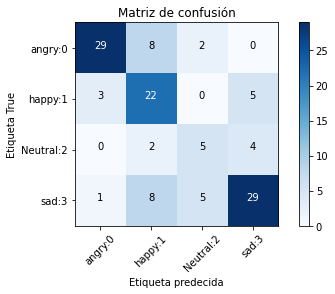

In [20]:
# Computar la matriz de confusión
cnf_matrix = confusion_matrix(y_test, y_predict, labels=[0,1,2,3])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_predict))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['angry:0','happy:1','Neutral:2','sad:3',],normalize= False,  title='Matriz de confusión')